<a href="https://colab.research.google.com/github/Gwizdo51/yolov3_deepFruits/blob/dev/1_yolov3_training_on_deepFruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Training

## setup

In [ ]:
!git clone https://github.com/Gwizdo51/yolov3_deepFruits.git

Cloning into 'yolov3_deepFruits'...
remote: Enumerating objects: 101, done.
remote: Counting objects: 100% (101/101), done.
remote: Compressing objects: 100% (77/77), done.
remote: Total 101 (delta 46), reused 58 (delta 15), pack-reused 0
Receiving objects: 100% (101/101), 162.73 KiB | 14.79 MiB/s, done.
Resolving deltas: 100% (46/46), done.


In [ ]:
%cd yolov3_deepFruits
!git checkout dev

/content/yolov3_deepFruits
Branch 'dev' set up to track remote branch 'dev' from 'origin'.
Switched to a new branch 'dev'


In [ ]:
!pip install -r requirements.txt

In [ ]:
!python download_deepfruits_dataset.py

952it [00:08, 108.59it/s]
DeepFruits dataset downloaded.


In [ ]:
!unzip -q deepFruits_dataset.zip -d ./ && rm deepFruits_dataset.zip

In [ ]:
!python prepare_deepfruits_for_training.py -v

Preparing dataset ...
Creating folder ...
Done.
Converting and copying images ...
apple-tree-1262424_960_720.jpg
Done.
Creating labels ...
urban-apple-tree.txt
Done.
Deleting useless data ...
Test images without labels : ['Blewah-benih-Buah-batu-biji-melon-Cina-Xinjiang-khusus-10-partikel-benih', '20151125T1143_pic000354', '5-charentais-melons-eb', '86', 'img_2120', 'hqdefault', '20151125T1143_pic000398', '6011852-3x2-940x627', '20151125T1143_pic000304', 'IMG_3020', '3767021934_a224ce6b99_b', '14943420-Growing-organic-vegetables-on-farm-in-Rocky-Ford-Colorado--Stock-Photo', '20151125T1138_pic000405', 'img_2942', '20151125T1138_pic000459', '20151125T1143_pic000224', 'photo11', 'cantaloupe-seeds-fruit-rock-melon-seeds-melon-seeds-Chinese-Xinjiang-specialty-10-Seed-particles', 'rockmelon1']
Train images without labels : []
Test labels without images : ['n07756641_702', 'n07756641_4886', 'n07756641_4481', 'n07756641_2478', 'n07756641_3980', 'n07756641_5433']
Train labels without images : [

In [ ]:
!rm -r deepFruits_dataset/

## Visual check that the training data is correct

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib inline
import matplotlib.image as mpimg
from pathlib import Path
import random
import os

In [ ]:
def get_boxes_coords(image_name, image_height, image_width, train_test):
    
    result = []
    
    with open(Path("deepFruits_for_training") / "labels" / train_test / (image_name + ".txt"), "r") as labels_file:
        for box in labels_file.read().split("\n")[:-1]:
            
            # values normalized between 0 and 1
            center_x_box, center_y_box, width_box, height_box = box.split()[1:]
            
            # values in pixels
            center_x_box = int(round(float(center_x_box) * image_width, 0))
            center_y_box = int(round(float(center_y_box) * image_height, 0))
            width_box = int(round(float(width_box) * image_width, 0))
            height_box = int(round(float(height_box) * image_height, 0))
            
            # compute the new values
            x1 = int(round(center_x_box - width_box/2, 0))
            y1 = int(round(center_y_box - height_box/2, 0))
            width = width_box
            height = height_box
            
            result.append((x1, y1, width, height))
    
    return result

# image_name = "20151125T1143_pic000294"
# img = mpimg.imread(Path("deepFruits_for_training") / "images" / "train" / (image_name + ".jpg"))
# get_boxes_coords(image_name, img.shape[0], img.shape[1], "train")

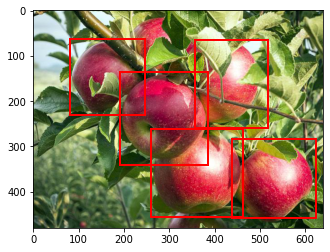

In [ ]:
train_test = random.choice(["train", "test"])

image_name = random.choice(next(os.walk(Path("deepFruits_for_training") / "images" / train_test))[2]).split(".")[0]

img = mpimg.imread(Path("deepFruits_for_training") / "images" / train_test / (image_name + ".jpg"))

fig, ax = plt.subplots()

ax.imshow(img)

boxes = get_boxes_coords(image_name, img.shape[0], img.shape[1], train_test)
for box in boxes:
    rect = patches.Rectangle((box[0], box[1]), box[2], box[3], linewidth=2, edgecolor='r', facecolor='none')
    ax.add_patch(rect)

plt.show()

## training

In [ ]:
!git clone https://github.com/ultralytics/yolov3

Cloning into 'yolov3'...
remote: Enumerating objects: 9852, done.
remote: Counting objects: 100% (57/57), done.
remote: Compressing objects: 100% (56/56), done.
remote: Total 9852 (delta 7), reused 17 (delta 1), pack-reused 9795
Receiving objects: 100% (9852/9852), 9.45 MiB | 9.61 MiB/s, done.
Resolving deltas: 100% (6654/6654), done.


In [ ]:
%cd yolov3/
%pip install -r requirements.txt

/content/yolov3
     |████████████████████████████████| 645kB 3.0MB/s 
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [ ]:
!python train.py --batch 8 --epochs 100 --data "../deepFruits.yaml" --weights yolov3.pt --nosave --cache

github: up to date with https://github.com/ultralytics/yolov3 ✅
YOLOv3 🚀 v9.5.0-11-gab7ff9d torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Namespace(adam=False, artifact_alias='latest', batch_size=8, bbox_interval=-1, bucket='', cache_images=True, cfg='', data='../deepFruits.yaml', device='', entity=None, epochs=100, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[640, 640], label_smoothing=0.0, linear_lr=False, local_rank=-1, multi_scale=False, name='exp', noautoanchor=False, nosave=True, notest=False, project='runs/train', quad=False, rect=False, resume=False, save_dir='runs/train/exp', save_period=-1, single_cls=False, sync_bn=False, total_batch_size=8, upload_dataset=False, weights='yolov3.pt', workers=8, world_size=1)
tensorboard: Start with 'tensorboard --logdir runs/train', view at http://localhost:6006/
2021-06-05 15:11:12.449606: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynam

# testing

In [ ]:
%cd yolov3/
!dir

/content/yolov3_deepFruits/yolov3
data	    hubconf.py	__pycache__	  runs	    tutorial.ipynb  yolov3.pt
detect.py   LICENSE	README.md	  test.py   utils
Dockerfile  models	requirements.txt  train.py  weights


In [ ]:
!python detect.py --weights "runs/train/exp/weights/last.pt" --img 640 --conf 0.25 --source "../deepFruits_for_training/images/test"

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.25, device='', exist_ok=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, line_thickness=3, max_det=1000, name='exp', nosave=False, project='runs/detect', save_conf=False, save_crop=False, save_txt=False, source='../deepFruits_for_training/images/test', update=False, view_img=False, weights=['runs/train/exp/weights/last.pt'])
YOLOv3 🚀 v9.5.0-11-gab7ff9d torch 1.8.1+cu101 CUDA:0 (Tesla T4, 15109.75MB)

Fusing layers... 
Model Summary: 261 layers, 61529740 parameters, 0 gradients, 155.0 GFLOPS
image 1/108 /content/yolov3_deepFruits/yolov3/../deepFruits_for_training/images/test/017.jpg: 448x640 18 strawberrys, Done. (0.027s)
image 2/108 /content/yolov3_deepFruits/yolov3/../deepFruits_for_training/images/test/100_1935.jpg: 512x640 7 strawberrys, Done. (0.027s)
image 3/108 /content/yolov3_deepFruits/yolov3/../deepFruits_for_training/images/test/1237.jpg: 448x640 3 apples, Done. (0.025s)
image 4/10